In [1]:
#Person#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/eshentong/BA780-team10-project/main/readmission.csv')

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df3 = df[['diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum','A1Cresult', 'metformin', 'repaglinide']]
df3.head()

,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide
0,250.83,?,?,1,None,None,No,No
1,276,250.01,255,9,None,None,No,No
2,648,250,V27,6,None,None,No,No
3,8,250.43,403,7,None,None,No,No
4,197,157,250,5,None,None,No,No


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   diag_1            101766 non-null  object
 1   diag_2            101766 non-null  object
 2   diag_3            101766 non-null  object
 3   number_diagnoses  101766 non-null  int64 
 4   max_glu_serum     101766 non-null  object
 5   A1Cresult         101766 non-null  object
 6   metformin         101766 non-null  object
 7   repaglinide       101766 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [ ]:
number_diagnoses = df3['number_diagnoses']
type(number_diagnoses)

pandas.core.series.Series

In [ ]:
# df3['number_diagnoses'] = df3['number_diagnoses'].astype(int)
# df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   diag_1            101766 non-null  object
 1   diag_2            101766 non-null  object
 2   diag_3            101766 non-null  object
 3   number_diagnoses  101766 non-null  int64 
 4   max_glu_serum     101766 non-null  object
 5   A1Cresult         101766 non-null  object
 6   metformin         101766 non-null  object
 7   repaglinide       101766 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


<Axes: xlabel='max_glu_serum', ylabel='count'>

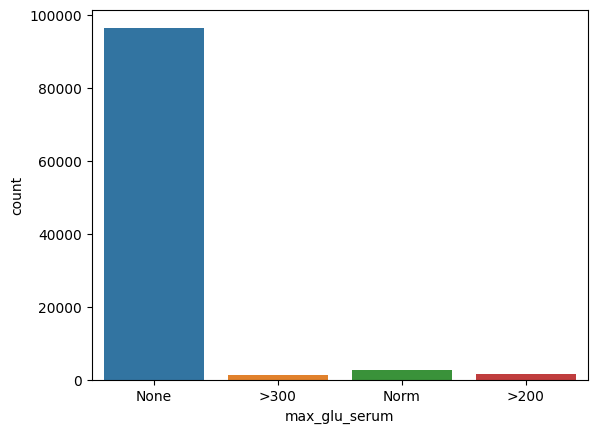

In [4]:
sns.countplot(x = df3['max_glu_serum'])

<Axes: xlabel='repaglinide', ylabel='count'>

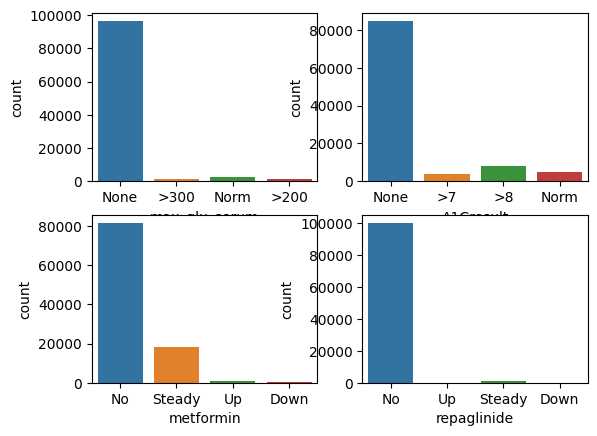

In [11]:
fig, axes = plt.subplots(2,2)
sns.countplot(data=df3, x='max_glu_serum',  ax=axes[0,0])
sns.countplot(data=df3, x='A1Cresult',  ax=axes[0,1])
sns.countplot(data=df3, x='metformin',  ax=axes[1,0])
sns.countplot(data=df3, x='repaglinide',  ax=axes[1,1])

In [ ]:
glucose_serum_test_result_summary = df3.groupby(['max_glu_serum'])['max_glu_serum'].count()
glucose_serum_test_result_summary

max_glu_serum
>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64

In [ ]:
number_diagnoses_summary = df3.groupby(['number_diagnoses'])['number_diagnoses'].count()
number_diagnoses_summary

number_diagnoses
1       219
2      1023
3      2835
4      5537
5     11393
6     10161
7     10393
8     10616
9     49474
10       17
11       11
12        9
13       16
14        7
15       10
16       45
Name: number_diagnoses, dtype: int64

<Axes: ylabel='Frequency'>

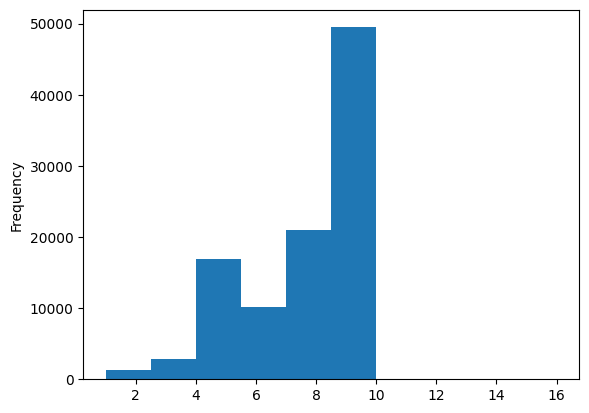

In [ ]:
number_diagnoses_hist = df3['number_diagnoses'].plot(kind = 'hist');
number_diagnoses_hist;

In [ ]:
df3['A1Cresult'] = df3['A1Cresult'].astype(str)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   diag_1            101766 non-null  object
 1   diag_2            101766 non-null  object
 2   diag_3            101766 non-null  object
 3   number_diagnoses  101766 non-null  int64 
 4   max_glu_serum     101766 non-null  object
 5   A1Cresult         101766 non-null  object
 6   metformin         101766 non-null  object
 7   repaglinide       101766 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


<ipython-input-19-139497fe8721>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['A1Cresult'] = df3['A1Cresult'].astype(str)


In [ ]:
A1Cresult_summary = df3.groupby(['A1Cresult'])['A1Cresult'].count()
A1Cresult_summary

A1Cresult
>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64

In [ ]:
metformin_summary = df3.groupby(['metformin'])['metformin'].count()
metformin_summary

metformin
Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

In [ ]:
repaglinide_summary = df3.groupby(['repaglinide'])['repaglinide'].count()
repaglinide_summary

repaglinide
Down          45
No        100227
Steady      1384
Up           110
Name: repaglinide, dtype: int64